In [6]:
import pandas as pd

# loading the data
file_path = "/Users/feisaldewji/Downloads/Forest_Area.csv"
df = pd.read_csv(file_path)

In [8]:
# Finding if there is missing values
print(df.isnull().sum())

CountryID                                               1
Country and Area                                        0
Forest Area, 1990                                       0
Forest Area, 2000                                       0
Forest Area, 2010                                       0
Forest Area, 2015                                       0
Forest Area, 2020                                       0
Total Land Area, 2020                                   0
Forest Area as a Proportion of Total Land Area, 2020    0
Deforestation, 2015-2020                                0
Total Forest Area Affected by Fire, 2015                0
dtype: int64


In [10]:
# showing rows with missing values
missing_data = df[df.isnull().any(axis=1)]
print(missing_data)

   CountryID Country and Area  Forest Area, 1990  Forest Area, 2000  \
0        NaN            WORLD         4236433.42         4158049.52   

   Forest Area, 2010 Forest Area, 2015  Forest Area, 2020  \
0         4106316.94                          4058930.81   

   Total Land Area, 2020  \
0             13003000.0   

   Forest Area as a Proportion of Total Land Area, 2020  \
0                                              31.13      

  Deforestation, 2015-2020 Total Forest Area Affected by Fire, 2015  
0                    10200                                    98040  


In [12]:
# dropping the rows with missing "country and area"
df = df.dropna(subset=['Country and Area'])

In [14]:
# Converting 'Forest Area, 2015' and other object columns to numeric
cols_to_fix = ['Forest Area, 2015', 'Deforestation, 2015-2020','Total Forest Area Affected by Fire, 2015']
df[cols_to_fix] = df[cols_to_fix].replace("...", None).apply(pd.to_numeric, errors='coerce')

In [16]:
#List of Amazon region countries
amazon_countries = [
    "Brazil", "Bolivia"
]

#Filter Amazon countries which are our key focus
df_amazon = df[df['Country and Area'].isin(amazon_countries)]

#display clean data set
print(df_amazon.to_string())

    CountryID Country and Area  Forest Area, 1990  Forest Area, 2000  Forest Area, 2010  Forest Area, 2015  Forest Area, 2020  Total Land Area, 2020  Forest Area as a Proportion of Total Land Area, 2020  Deforestation, 2015-2020  Total Forest Area Affected by Fire, 2015
29       76.0           Brazil           588898.0           551088.6           511580.7           503884.8           496619.6               835814.0                                                 59.42                    1695.7                                  32998.07


In [18]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [19]:
print(df_amazon.to_markdown())

|    |   CountryID | Country and Area   |   Forest Area, 1990 |   Forest Area, 2000 |   Forest Area, 2010 |   Forest Area, 2015 |   Forest Area, 2020 |   Total Land Area, 2020 |   Forest Area as a Proportion of Total Land Area, 2020 |   Deforestation, 2015-2020 |   Total Forest Area Affected by Fire, 2015 |
|---:|------------:|:-------------------|--------------------:|--------------------:|--------------------:|--------------------:|--------------------:|------------------------:|-------------------------------------------------------:|---------------------------:|-------------------------------------------:|
| 29 |          76 | Brazil             |              588898 |              551089 |              511581 |              503885 |              496620 |                  835814 |                                                  59.42 |                     1695.7 |                                    32998.1 |


In [20]:
df_amazon.style.set_properties(**{'text-align': 'left'}).set_caption("Cleaned Amazon Forest Data")

,CountryID,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015-2020","Total Forest Area Affected by Fire, 2015"
29,76.000000,Brazil,588898.000000,551088.600000,511580.700000,503884.800000,496619.600000,835814.000000,59.420000,1695.700000,32998.070000


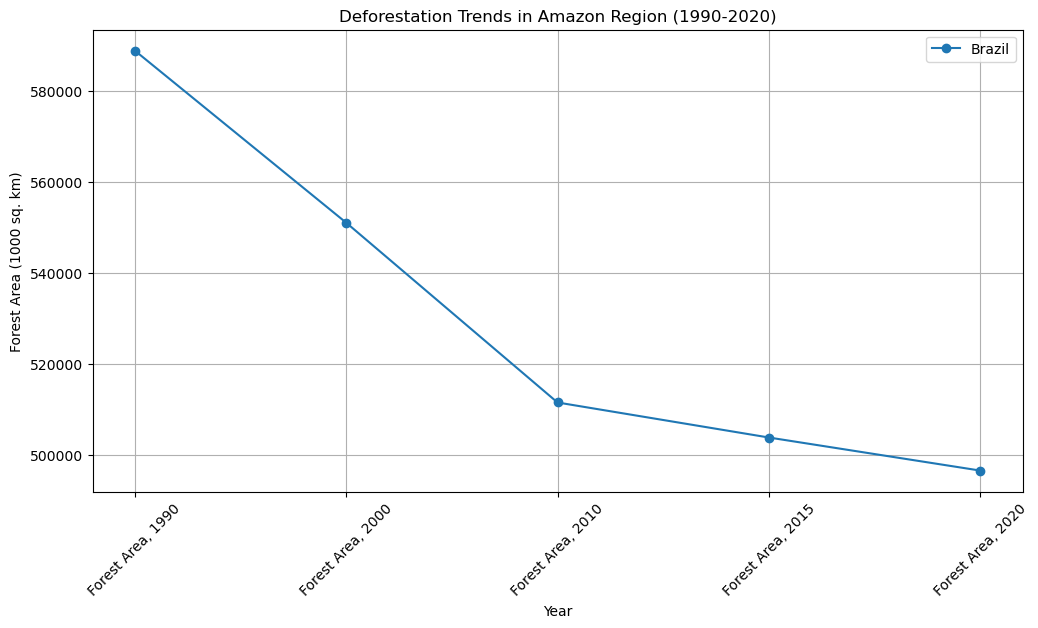

In [24]:
import matplotlib.pyplot as plt

# Set index as 'Country and Area' for easier plotting
df_amazon.set_index('Country and Area', inplace=True)

# Select relevant years for plotting
years = ['Forest Area, 1990', 'Forest Area, 2000', 'Forest Area, 2010', 'Forest Area, 2015', 'Forest Area, 2020']

# Plot trends for each Amazon country
plt.figure(figsize=(12, 6))
for country in df_amazon.index:
    plt.plot(years, df_amazon.loc[country, years], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Forest Area (1000 sq. km)')
plt.title('Deforestation Trends in Amazon Region (1990-2020)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
print(df_amazon.columns)

Index(['CountryID', 'Forest Area, 1990', 'Forest Area, 2000',
       'Forest Area, 2010', 'Forest Area, 2015', 'Forest Area, 2020',
       'Total Land Area, 2020',
       'Forest Area as a Proportion of Total Land Area, 2020',
       'Deforestation, 2015-2020', 'Total Forest Area Affected by Fire, 2015'],
      dtype='object')


In [48]:
df_amazon.columns = df_amazon.columns.str.strip()
print(df_amazon.columns.tolist())


['CountryID', 'Country and Area', 'Forest Area, 1990', 'Forest Area, 2000', 'Forest Area, 2010', 'Forest Area, 2015', 'Forest Area, 2020', 'Total Land Area, 2020', 'Forest Area as a Proportion of Total Land Area, 2020', 'Deforestation, 2015-2020', 'Total Forest Area Affected by Fire, 2015']


In [50]:
df_amazon = df_amazon.rename(columns={"Correct Column Name": "Country and Area"})

In [52]:
df_amazon = df_amazon.copy()
df_amazon.rename(columns={"Correct Column Name": "Country and Area"}, inplace=True)

In [54]:
df_amazon = df[df["Country and Area"].isin(["Brazil", "Bolivia"])].copy()  # Ensure a copy
df_amazon.rename(columns={"Correct Column Name": "Country and Area"}, inplace=True)  # Replace with actual name
print(df_amazon.head())  # Confirm changes

    CountryID Country and Area  Forest Area, 1990  Forest Area, 2000  \
29       76.0           Brazil           588898.0           551088.6   

    Forest Area, 2010 Forest Area, 2015  Forest Area, 2020  \
29           511580.7          503884.8           496619.6   

    Total Land Area, 2020  \
29               835814.0   

    Forest Area as a Proportion of Total Land Area, 2020  \
29                                              59.42      

    Deforestation, 2015-2020 Total Forest Area Affected by Fire, 2015  
29                    1695.7                                 32998.07  


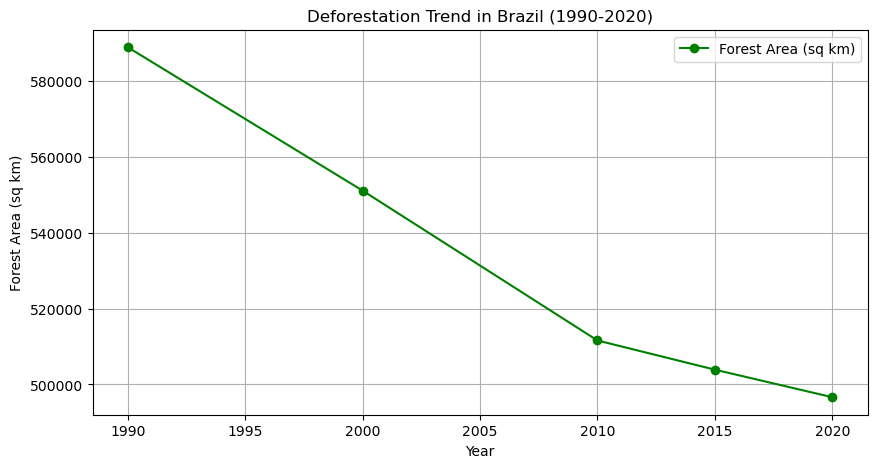

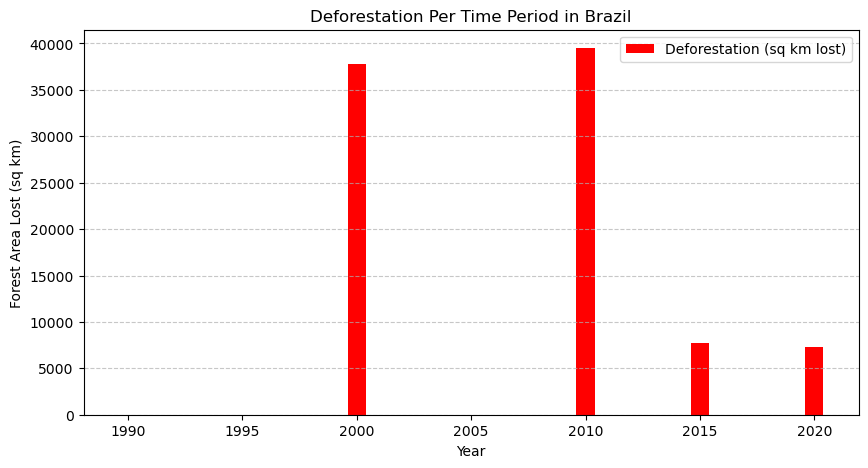

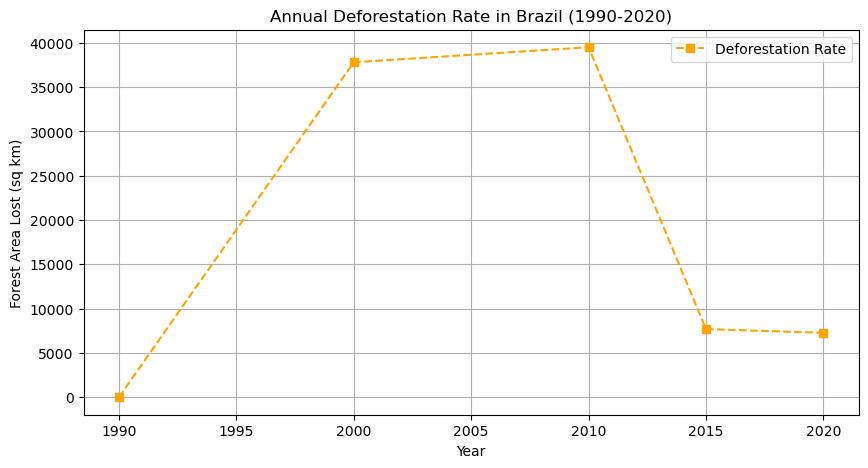

In [81]:
brazil_df = df[df["Country and Area"] == "Brazil"]

# Select relevant columns (years for forest area data)
brazil_forest_data = brazil_df.iloc[:, 2:7]  # Selecting only year columns
brazil_forest_data = brazil_forest_data.T  # Transpose for easier visualization

# Rename columns
brazil_forest_data.columns = ["Forest Area (sq km)"]
brazil_forest_data.index = ["1990", "2000", "2010", "2015", "2020"]
brazil_forest_data.index = brazil_forest_data.index.astype(int)  # Convert index to int

# Convert forest area values to numeric
brazil_forest_data["Forest Area (sq km)"] = pd.to_numeric(
    brazil_forest_data["Forest Area (sq km)"], errors='coerce'
)

# Extract years and forest area values
years = brazil_forest_data.index
forest_area = brazil_forest_data["Forest Area (sq km)"]

# Calculate deforestation (difference between years)
deforestation = forest_area.diff().fillna(0) * -1  # Convert to positive values

# Plot Line Chart: Forest Area Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, forest_area, marker='o', linestyle='-', color='green', label="Forest Area (sq km)")
plt.xlabel("Year")
plt.ylabel("Forest Area (sq km)")
plt.title("Deforestation Trend in Brazil (1990-2020)")
plt.grid(True)
plt.legend()
plt.show()

# Plot Bar Chart: Deforestation Amount per Period
plt.figure(figsize=(10, 5))
plt.bar(years, deforestation, color='red', label="Deforestation (sq km lost)")
plt.xlabel("Year")
plt.ylabel("Forest Area Lost (sq km)")
plt.title("Deforestation Per Time Period in Brazil")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# Plot Line Chart: Deforestation Rate (sq km lost per year)
plt.figure(figsize=(10, 5))
plt.plot(years, deforestation, marker='s', linestyle='--', color='orange', label="Deforestation Rate")
plt.xlabel("Year")
plt.ylabel("Forest Area Lost (sq km)")
plt.title("Annual Deforestation Rate in Brazil (1990-2020)")
plt.grid(True)
plt.legend()
plt.show()

#Deforestation in the Amazon rainforest, particularly in Brazil, has been a significant environmental concern. This analysis aims to visualize forest loss using data-driven insights.

Step 1: Load and Filter the Data
Objective: I extracted relevant data for Brazil from the dataset.
Load the dataset into a Pandas DataFrame.
Inspect the dataset structure (columns, data types, missing values).
Filter data specifically for Brazil.
Extract relevant columns representing forest area over different years.
Convert data types to ensure numerical accuracy for calculations.
Display and verify the extracted dataset.

Step 2: Analyze Trends Over Time
Objective: Identify patterns in deforestation over the years.
Create a line chart to visualize the decline in forest area from 1990 to 2020.
Use data points for each available year (1990, 2000, 2010, 2015, 2020).
Highlight key trends in the deforestation process.

Step 3: Compare Yearly Changes in Deforestation
Objective: Quantify the amount of forest loss between different periods.
Calculate the deforestation amount by computing differences in forest area between consecutive years.
Use a bar chart to visualize forest loss for each time period.
Represent the lost forest area in square kilometers to give a clear picture of the environmental impact.


Key Visualizations and Their Purpose:
Line Chart: Shows the decline in forest area over time.
Bar Chart: Highlights the amount of deforestation in each period.
Deforestation Rate Chart: Analyzes how the rate of forest loss has changed over the years.
Histogram/Heatmap (if applicable): Helps in identifying patterns and relationships.

